<a href="https://colab.research.google.com/github/Veeraja113/Veeraja/blob/main/Virtusa_major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

In [2]:
!git clone https://github.com/Veeraja113/Virtusa-majorProject.git


fatal: destination path 'Virtusa-majorProject' already exists and is not an empty directory.


In [ ]:
import cv2
import numpy as np
import operator
import os

# module level variables 
MIN_CONTOUR_AREA = 300 #1220, 1500
MAX_CONTOUR_AREA = 1900 #1900, 2000
RESIZED_IMAGE_WIDTH = 20
RESIZED_IMAGE_HEIGHT = 30

class ContourWithData():

	# member variables 
	npaContour = None           # contour
	boundingRect = None         # bounding rect for contour
	intRectX = 0                # bounding rect top left corner x location
	intRectY = 0                # bounding rect top left corner y location
	intRectWidth = 0            # bounding rect width
	intRectHeight = 0           # bounding rect height
	fltArea = 0.0               # area of contour

	def calculateRectTopLeftPointAndWidthAndHeight(self):               # calculate bounding rect info
		  [intX, intY, intWidth, intHeight] = self.boundingRect
		  self.intRectX = intX
		  self.intRectY = intY
		  self.intRectWidth = intWidth
		  self.intRectHeight = intHeight

	def checkIfContourIsValid(self):                            # this is oversimplified, for a production grade program
		  if self.fltArea < MIN_CONTOUR_AREA or self.fltArea > MAX_CONTOUR_AREA: return False        # much better validity checking would be necessary
		  return True



cap = cv2.VideoCapture(1)

if cap.isOpened() == False:
	print ("Unable to read camera feed")

while(cap.isOpened()):
	#capture frame by frame
	ret, frame = cap.read()
	if ret == True:
		allContoursWithData = [] # declare empty lists,
		validContoursWithData = [] # we will fill these shortly
	
		npaClassifications = np.loadtxt("classifications.txt", np.float32) #read in class images
		npaFlattenedImages = np.loadtxt("flattened_images.txt", np.float32) # read in training images

		npaClassifications = npaClassifications.reshape((npaClassifications.size, 1)) # reshape numpy array to 1d, necessary to pass to call to train

		kNearest = cv2.KNearest() # instantiate KNN object

		kNearest.train(npaFlattenedImages, npaClassifications)

		imgTestingNumbers = frame # cv2.imread("test5.png") read in testing numbers image

		imgGray = cv2.cvtColor(imgTestingNumbers, cv2.COLOR_BGR2GRAY) # get grayscale image
		imgBlurred = cv2.GaussianBlur(imgGray, (5,5), 0) # blur

		# filter image from grayscale to black and white
		imgThresh = cv2.adaptiveThreshold(imgBlurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)                                    

		imgThreshCopy = imgThresh.copy()

		npaContours, npaHierarchy = cv2.findContours(imgThreshCopy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
		for npaContour in npaContours:                             # for each contour
			contourWithData = ContourWithData()                                             # instantiate a contour with data object
			contourWithData.npaContour = npaContour                                         # assign contour to contour with data
			contourWithData.boundingRect = cv2.boundingRect(contourWithData.npaContour)     # get the bounding rect
			contourWithData.calculateRectTopLeftPointAndWidthAndHeight()                    # get bounding rect info
			contourWithData.fltArea = cv2.contourArea(contourWithData.npaContour)           # calculate the contour area
			allContoursWithData.append(contourWithData)                                     # add contour with data object to list of all contours with data
			# end for

		for contourWithData in allContoursWithData:                 # for all contours
			if contourWithData.checkIfContourIsValid():             # check if valid
					validContoursWithData.append(contourWithData)       # if so, append to valid contour list
			# end if
			# end for

		validContoursWithData.sort(key = operator.attrgetter("intRectX"))         # sort contours from left to right

		strFinalString = ""         # declare final string, this will have the final number sequence by the end of the program

		for contourWithData in validContoursWithData:            # for each contour
						                                  # draw a green rect around the current char
			cv2.rectangle(imgTestingNumbers,                                        # draw rectangle on original testing image
						        (contourWithData.intRectX, contourWithData.intRectY),     # upper left corner
						        (contourWithData.intRectX + contourWithData.intRectWidth, contourWithData.intRectY + contourWithData.intRectHeight),      # lower right corner
						        (0, 255, 0),              # green
						        2)                        # thickness

			imgROI = imgThresh[contourWithData.intRectY : contourWithData.intRectY + contourWithData.intRectHeight,     # crop char out of threshold image
						             contourWithData.intRectX : contourWithData.intRectX + contourWithData.intRectWidth]

			imgROIResized = cv2.resize(imgROI, (RESIZED_IMAGE_WIDTH, RESIZED_IMAGE_HEIGHT))             # resize image, this will be more consistent for recognition and storage

			npaROIResized = imgROIResized.reshape((1, RESIZED_IMAGE_WIDTH * RESIZED_IMAGE_HEIGHT))      # flatten image into 1d numpy array

			npaROIResized = np.float32(npaROIResized)       # convert from 1d numpy array of ints to 1d numpy array of floats

			retval, npaResults, neigh_resp, dists = kNearest.find_nearest(npaROIResized, k = 1)     # call KNN function find_nearest

			strCurrentChar = str(chr(int(npaResults[0][0])))                                             # get character from results

			strFinalString = strFinalString + strCurrentChar            # append current char to full string
		# end for

		print ("\n" + strFinalString + "\n" )                 # show the full string

		cv2.imshow("imgTestingNumbers", imgTestingNumbers)      # show input image with green boxes drawn around found digits
		if cv2.waitKey(1) & 0Xff == ord('q'):
			break
			
	else:
		break
                                

cap.release()
cv2.destroyAllWindows()             # remove windows from memory


	
	






Unable to read camera feed


In [ ]:

import numpy as np
import operator
import os


MIN_CONTOUR_AREA = 1220 # 300 (BDAY) 1220, 1500 (T)
MAX_CONTOUR_AREA = 1900 #1900, 2000
RESIZED_IMAGE_WIDTH = 20
RESIZED_IMAGE_HEIGHT = 30

waypoints = [[(4.087, 0.717, 0.0), (0.0, 0.0, 0.995, 0.096)],
		[(1.158, -3.943, 0.0), (0.0, 0.0, -0.783, 0.622)],
		[(1.109, 0.084, 0.0), (0.0, 0.0, 0.986, 0.168)],
		[(2.652, 3.483, 0.0), (0.0, 0.0, 0.584, 0.812)]
]


class ContourWithData(object):
	def __init__(self):
		self.boundingRect = None # bounding rect for contour
		self.intRectX = 0 # bounding rect top left corner x location
		self.intRectY = 0 # bounding rect top left corner y location
		self.intRectWidth = 0 # bounding rect width
		self.intRectHeight = 0 # bounding rect height
		self.fltArea = 0.0 # area of contour

	def calculateRectTopLeftPointAndWidthAndHeight(self): # calculate bounding rect info
		  [intX, intY, intWidth, intHeight] = self.boundingRect
		  self.intRectX = intX
		  self.intRectY = intY
		  self.intRectWidth = intWidth
		  self.intRectHeight = intHeight

	def checkIfContourIsValid(self): #check valid contour via area
		  if self.fltArea < MIN_CONTOUR_AREA or self.fltArea > MAX_CONTOUR_AREA: return False
		  return True



class Comp5(object):
	def __init__(self):
		rospy.Subscriber('camera/rgb/camera_info', CameraInfo, self.caminfo_cb)
		rospy.Subscriber('/amcl_pose', PoseWithCovarianceStamped, self.amcl_cb)
				
		self.cmd_vel_pub = rospy.Publisher('cmd_vel/velocityramp', Twist, queue_size=1)
		self.twist = Twist()

		self.client = actionlib.SimpleActionClient('move_base', MoveBaseAction)  
		self.client.wait_for_server()
		
		self.fpv_vid()
		
		
	def caminfo_cb(self, msg):
		self.K = np.array(msg.K).reshape(3,3)
		self.D = np.array(msg.D)

	#get bot current pos 
	def amcl_cb(self, msg):
		self.pose = msg.pose.pose
		self.px = self.pose.position.x
		self.py = self.pose.position.y
		print( self.px, self.py)
					
	def makeSound(self, i):
		if (i==1):
			playsound('bday.wav')
		
	#turn waypoints into a movebase goal
	def goal_pose(self,pose):
		goal_pose = MoveBaseGoal()
		goal_pose.target_pose.header.frame_id = 'map'
		goal_pose.target_pose.pose.position.x = pose[0][0]
		goal_pose.target_pose.pose.position.y = pose[0][1]
		goal_pose.target_pose.pose.position.z = pose[0][2]
		goal_pose.target_pose.pose.orientation.x = pose[1][0]
		goal_pose.target_pose.pose.orientation.y = pose[1][1]
		goal_pose.target_pose.pose.orientation.z = pose[1][2]
		goal_pose.target_pose.pose.orientation.w = pose[1][3]
		return goal_pose
		
	def fpv_vid(self):
		cap = cv2.VideoCapture(0) #init vid
		if cap.isOpened() == False:
			print ("Unable to read camera feed")

		while(cap.isOpened()):
			#capture frame by frame
			ret, frame = cap.read()
			if ret == True:
				allContoursWithData = [] 
				validContoursWithData = [] 
	
				npaClassifications = np.loadtxt("classifications.txt", np.float32) #read in class img
				npaFlattenedImages = np.loadtxt("flattened_images.txt", np.float32) # read in training img

				npaClassifications = npaClassifications.reshape((npaClassifications.size, 1)) # reshape 

				kNearest = cv2.KNearest() # instantiate KNN object

				kNearest.train(npaFlattenedImages, npaClassifications)

				imgTestingNumbers = frame # cv2.imread("test5.png") read in testing numbers image

				imgGray = cv2.cvtColor(imgTestingNumbers, cv2.COLOR_BGR2GRAY)
				imgBlurred = cv2.GaussianBlur(imgGray, (5,5), 0) # blur

				# filter image from grayscale to black and white
				imgThresh = cv2.adaptiveThreshold(imgBlurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)                                    

				imgThreshCopy = imgThresh.copy()

				npaContours, npaHierarchy = cv2.findContours(imgThreshCopy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
				
				for npaContour in npaContours: # for each contour
					contourWithData = ContourWithData()
					contourWithData.npaContour = npaContour
					contourWithData.boundingRect = cv2.boundingRect(contourWithData.npaContour)
					contourWithData.calculateRectTopLeftPointAndWidthAndHeight()
					contourWithData.fltArea = cv2.contourArea(contourWithData.npaContour)
					allContoursWithData.append(contourWithData)
					# end for

				for contourWithData in allContoursWithData: # for all contours
					if contourWithData.checkIfContourIsValid(): # check if valid
							validContoursWithData.append(contourWithData) 
					# end if
					# end for

				validContoursWithData.sort(key = operator.attrgetter("intRectX"))

				strFinalString = ""

				for contourWithData in validContoursWithData:

					cv2.rectangle(imgTestingNumbers, (contourWithData.intRectX, contourWithData.intRectY), (contourWithData.intRectX + contourWithData.intRectWidth, contourWithData.intRectY + contourWithData.intRectHeight), (0, 255, 0), 2)                        

					imgROI = imgThresh[contourWithData.intRectY : contourWithData.intRectY + contourWithData.intRectHeight, contourWithData.intRectX : contourWithData.intRectX + contourWithData.intRectWidth]

					imgROIResized = cv2.resize(imgROI, (RESIZED_IMAGE_WIDTH, RESIZED_IMAGE_HEIGHT))

					npaROIResized = imgROIResized.reshape((1, RESIZED_IMAGE_WIDTH * RESIZED_IMAGE_HEIGHT)) 

					npaROIResized = np.float32(npaROIResized)

					retval, npaResults, neigh_resp, dists = kNearest.find_nearest(npaROIResized, k = 1)

					strCurrentChar = str(chr(int(npaResults[0][0])))

					strFinalString = strFinalString + strCurrentChar
				# end for

				#print "\n" + strFinalString + "\n" # show the full string
				
				if strFinalString == "T1":
					wp_pose = waypoints[1] #POS 1
					wp_goal = self.goal_pose(wp_pose) #create movebase goal
					self.client.send_goal(wp_goal)
					self.client.wait_for_result()
					
					wp_pose = waypoints[0] #BACK HOME
					wp_goal = self.goal_pose(wp_pose) #create movebase goal
					self.client.send_goal(wp_goal)
					self.client.wait_for_result()
							
				elif strFinalString == "T2":
					wp_pose = waypoints[2] #POS 2
					wp_goal = self.goal_pose(wp_pose) #create movebase goal
					self.client.send_goal(wp_goal)
					self.client.wait_for_result()
					
					wp_pose = waypoints[0] #BACK HOME
					wp_goal = self.goal_pose(wp_pose) #create movebase goal
					self.client.send_goal(wp_goal)
					self.client.wait_for_result()
					
				elif strFinalString == "T3":
					wp_pose = waypoints[3] #POS 3
					wp_goal = self.goal_pose(wp_pose) #create movebase goal
					self.client.send_goal(wp_goal)
					self.client.wait_for_result()
					
					wp_pose = waypoints[0] #BACK HOME
					wp_goal = self.goal_pose(wp_pose) #create movebase goal
					self.client.send_goal(wp_goal)
					self.client.wait_for_result()
				
				elif strFinalString == "BD2":
					wp_pose = waypoints[2] #POS 1
					wp_goal = self.goal_pose(wp_pose) #create movebase goal
					self.client.send_goal(wp_goal)
					self.client.wait_for_result()
					
					self.makeSound(1) #play music 
					
					wp_pose = waypoints[0] #BACK HOME
					wp_goal = self.goal_pose(wp_pose) #create movebase goal
					self.client.send_goal(wp_goal)
					self.client.wait_for_result()
				
				#cv2.imshow("imgTestingNumbers", imgTestingNumbers) 
				if cv2.waitKey(1) & 0Xff == ord('q'):
					break
			
			else:
				break
				                            

		cap.release()
		cv2.destroyAllWindows() 


	






In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('/content/sample_data/house.csv')

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
x=df['longitude']
y=df['latitude']

<BarContainer object of 3000 artists>

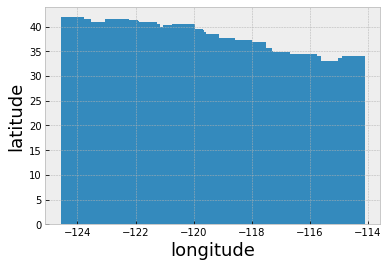

In [ ]:
plt.xlabel('longitude',fontsize=18)
plt.ylabel('latitude',fontsize=18)
plt.bar(x,y)

([<matplotlib.patches.Wedge at 0x7ff24320d940>,
  ...],
 [Text(1.0999993367106538, 0.0012079884610621437, '-122.05'),
  Text(1.0999943570073059, 0.003523429023572891, '-118.3'),
  Text(1.0999851132914171, 0.005722808512297486, '-117.81'),
  Text(1.0999715743807166, 0.007907942488911832, '-118.36'),
  Text(1.0999529352629442, 0.010175470821205507, '-119.67'),
  Text(1.0999286347242943, 0.012529904770209968, '-119.56'),
  Text(1.0998982860349003, 0.014958622178824574, '-121.43'),
  Text(1.0998631003532613, 0.017353975951127205, '-120.65'),
  Text(1.0998228315439957, 0.01974181386163693, '-122.84'),
  Text(1.0997782881680287, 0.02208431285326295, '-118.02'),
  Text(1.099731919003051, 0.024283869664177404, '-118.24'),
  Text(1.099679771740388, 0.02654052797154724, '-119.12'),
  Text(1.0996202215082747, 0.028902741221086502, '-121.93'),
  Text(1.0995582391231133, 0.031171762485919526, '-117.03'),
  Text(1.099495027938817, 0.033326919116837925, '-117.97'),
  Text(1.0994267164167149, 0.035509

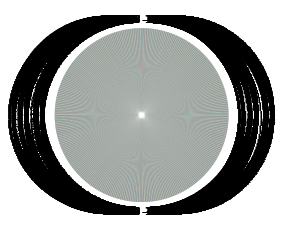

In [ ]:
plt.pie(y,labels=x)

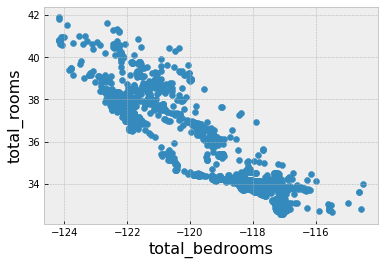

In [ ]:
plt.xlabel('total_bedrooms',fontsize=16)
plt.ylabel('total_rooms',fontsize=16)
plt.scatter(x,y)

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


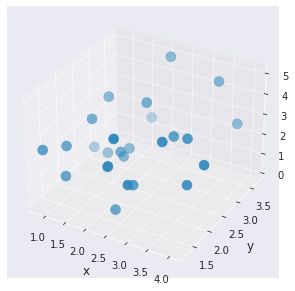

In [ ]:

import seaborn as seaborn
import matplotlib.pyplot as plot
import numpy as np

seaborn.set_style("darkgrid")

median_income=2.225
housing_median_age = 26


x1 = np.random.normal(median_income, 1, size=housing_median_age)
y1 = np.random.normal(median_income, 1, size=housing_median_age)
z1 = np.random.normal(median_income, 1, size=housing_median_age)

plot.figure(figsize=(6,5))
axes = plot.axes(projection='3d')
print(type(axes))
axes.scatter3D(x1, y1, z1,s=100)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')
plot.show()

In [ ]:
df = pd.read_csv('/content/sample_data/house_areas.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
import numpy as np 

df['latitude'] = np.where(df['latitude'] == '37', 1, 0)

In [ ]:
X = df[['longitude', 'total_rooms']]

y = df['latitude']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,

test_size=0.33, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix

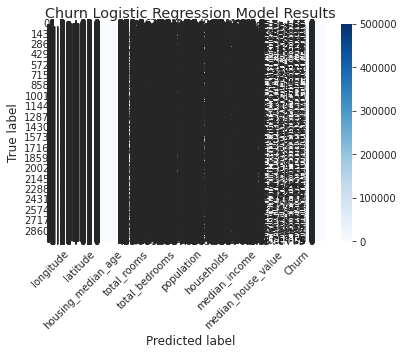

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(df, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Churn Logistic Regression Model Results')

plt.show()    

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from sklearn.svm import SVR
svr = SVR()
sld = svr.fit(X_test, y_test)

In [ ]:
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf_model = LogisticRegression()





In [ ]:
df.info

<bound method DataFrame.info of       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -0.000347       0.0            0.000077     0.011059        0.001882   
1     -0.000660       0.0            0.000240     0.008420        0.001729   
2     -0.000426       0.0            0.000098     0.012981        0.001834   
3     -0.000359       0.0            0.000085     0.000203        0.000045   
4     -0.001422       0.0            0.000226     0.014743        0.002899   
...         ...       ...                 ...          ...             ...   
2995  -0.000524       0.0            0.000100     0.006336        0.002805   
2996  -0.000476       0.0            0.000109     0.021199        0.004363   
2997  -0.001871       0.0            0.000156     0.014946        0.003142   
2998  -0.000720       0.0            0.000246     0.000590        0.000086   
2999  -0.000238       0.0            0.000084     0.003509        0.000523   

      population  households  m